In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
file_path = r"/Users/roman/Desktop/Новая папка/marketing_AB.csv"
data = pd.read_csv(file_path)

In [9]:
data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [11]:
# Основная задача – проанализировать группы клиентов и ответить навопрос, какой тип рекламы был успешнее.
# Большинство людей будут видеть рекламу. 
# А небольшая часть людей вместо этого увидит социальную рекламу (PSA) (или ничего) в том же размере и в том месте, где обычно находится реклама.

In [23]:
# Разделение данных на группы A и B
group_a = data[data['test group'] == 'A']['converted']
group_b = data[data['test group'] == 'B']['converted']

In [25]:
# Подсчет конверсий для каждой группы
conversion_a = group_a.mean()
conversion_b = group_b.mean()

In [27]:
# Проводим t-тест для проверки значимости разницы
t_stat, p_value = stats.ttest_ind(group_a, group_b)

In [29]:
# Вывод результатов
print(f'Конверсия группы A: {conversion_a:.2f}')
print(f'Конверсия группы B: {conversion_b:.2f}')
print(f'p-значение: {p_value:.4f}')

Конверсия группы A: nan
Конверсия группы B: nan
p-значение: nan


In [31]:
# Интерпретация результата
if p_value < 0.05:
    print("Существует значимая разница в конверсии между группами A и B.")
else:
    print("Нет значимой разницы в конверсии между группами A и B.")

Нет значимой разницы в конверсии между группами A и B.


In [41]:
# Группируем данные по тестовым группам и подсчитываем конверсии
conversion_rates = data.groupby('test group')['converted'].mean().reset_index()

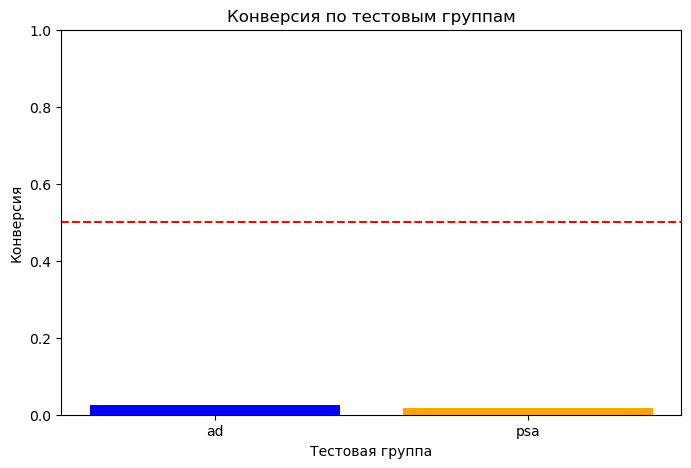

In [43]:
# Визуализация
plt.figure(figsize=(8, 5))
plt.bar(conversion_rates['test group'], conversion_rates['converted'], color=['blue', 'orange'])
plt.xlabel('Тестовая группа')
plt.ylabel('Конверсия')
plt.title('Конверсия по тестовым группам')
plt.ylim(0, 1)  # Устанавливаем пределы по y от 0 до 1
plt.axhline(y=0.5, color='r', linestyle='--')  # Проводим горизонтальную линию для наглядности
plt.show()

In [ ]:
# Конверсия в группе клиентов, которой показывали вариант рекламы А, и в группе клиентов, которой показывали вариант социальной рекламы не отличаются. 